Task - 03

Problem Statement - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. 

In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
from sklearn.tree import plot_tree

Bank Dataset

In [67]:
df = pd.read_csv("C:/Users/syona/OneDrive/Documents/ProdigyInfotech/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [71]:
#to check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [72]:
#statistical counts
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [73]:
#separating categorical columns from numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

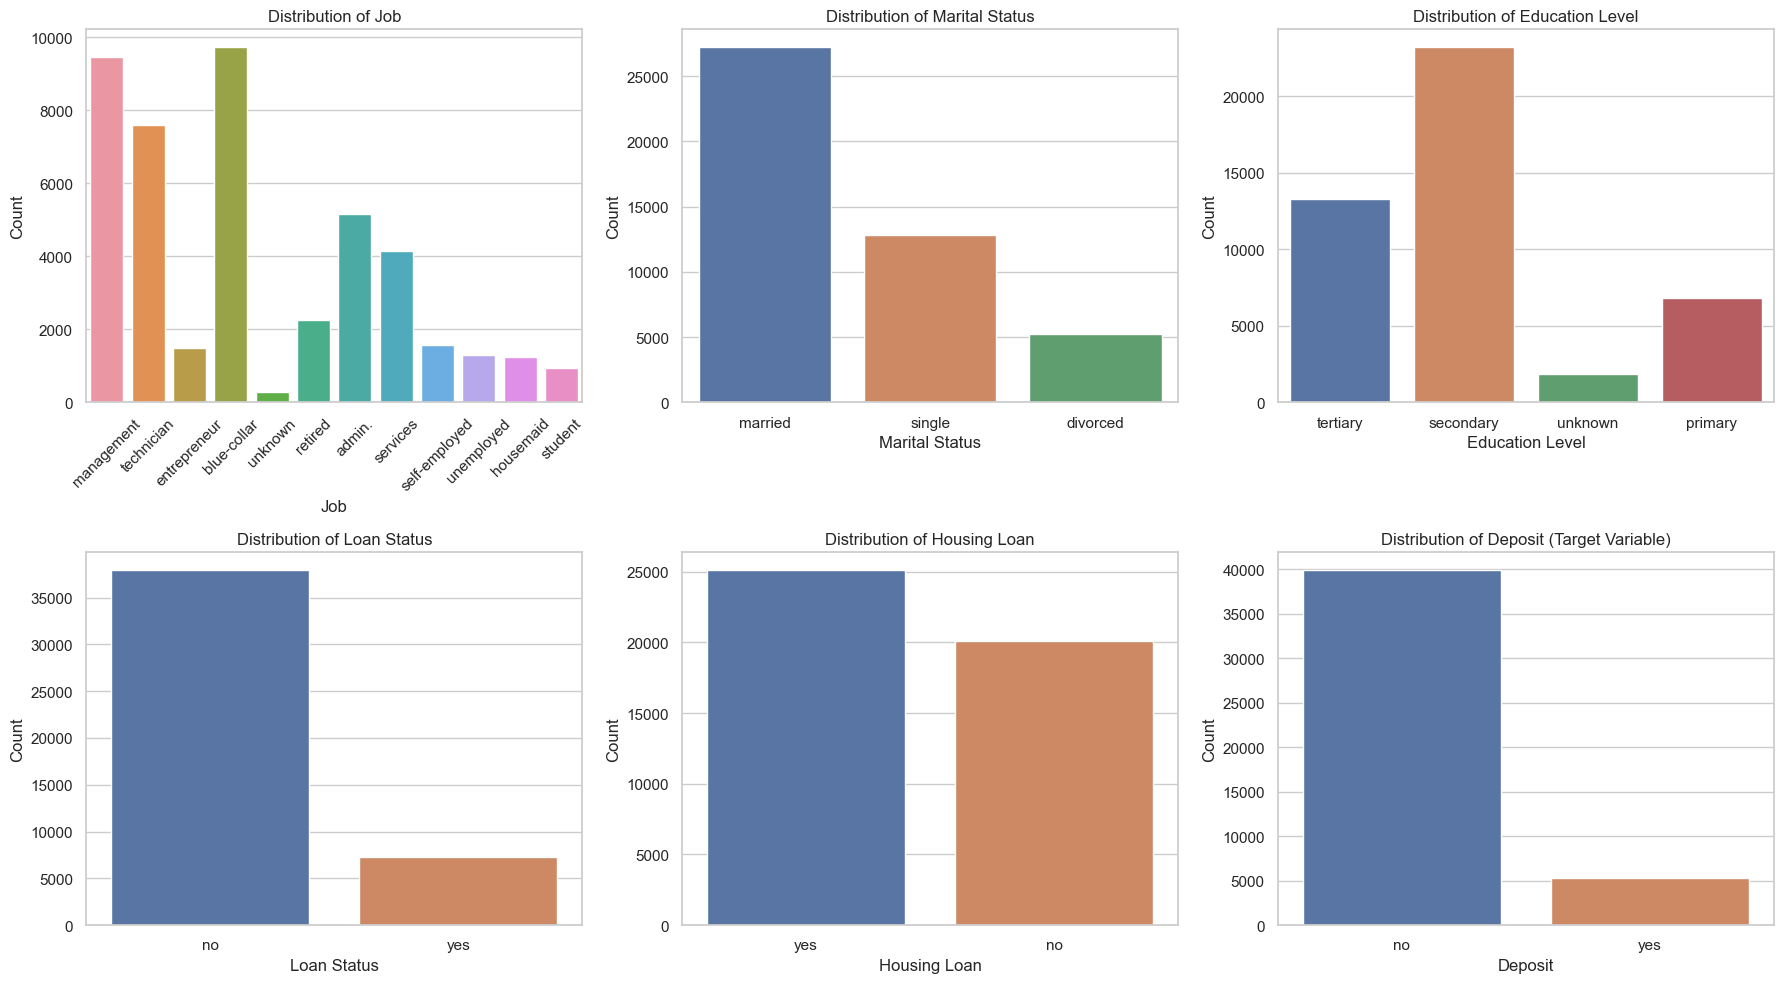

In [74]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Bar Plot for 'job'
sns.countplot(x='job', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Job')
axes[0, 0].set_xlabel('Job')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar Plot for 'marital'
sns.countplot(x='marital', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Marital Status')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Count')

# Bar Plot for 'education'
sns.countplot(x='education', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Education Level')
axes[0, 2].set_xlabel('Education Level')
axes[0, 2].set_ylabel('Count')

# Bar Plot for 'loan'
sns.countplot(x='loan', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Loan Status')
axes[1, 0].set_xlabel('Loan Status')
axes[1, 0].set_ylabel('Count')

# Bar Plot for 'housing'
sns.countplot(x='housing', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Housing Loan')
axes[1, 1].set_xlabel('Housing Loan')
axes[1, 1].set_ylabel('Count')

# Bar Plot for 'deposit' (target variable)
sns.countplot(x='y', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Deposit (Target Variable)')
axes[1, 2].set_xlabel('Deposit')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

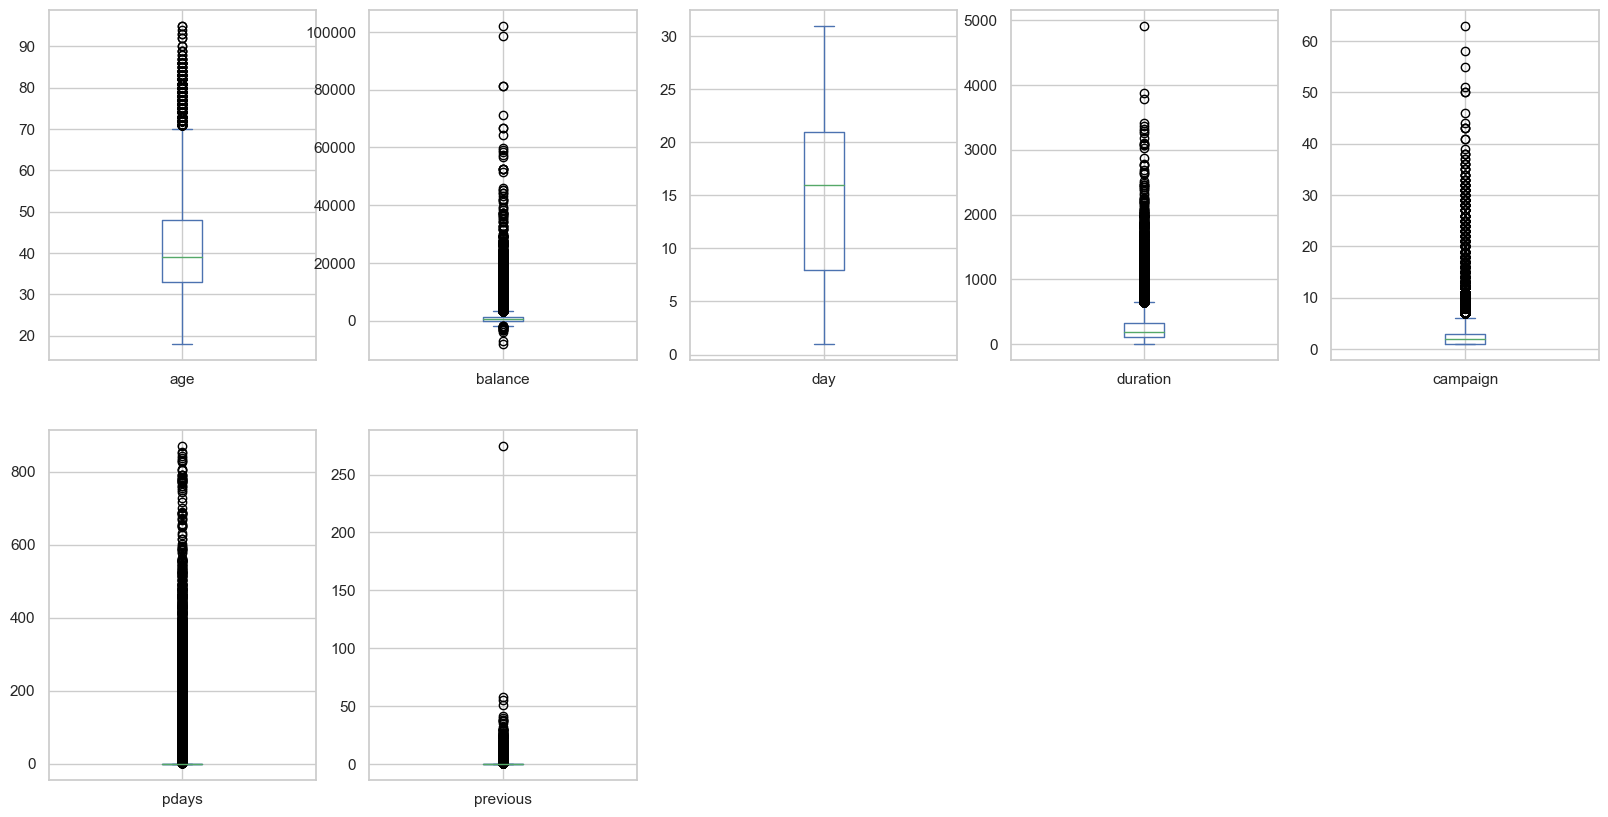

In [75]:
#obtaining box plot
df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10))
plt.show()

100.0 253.0 -147.0


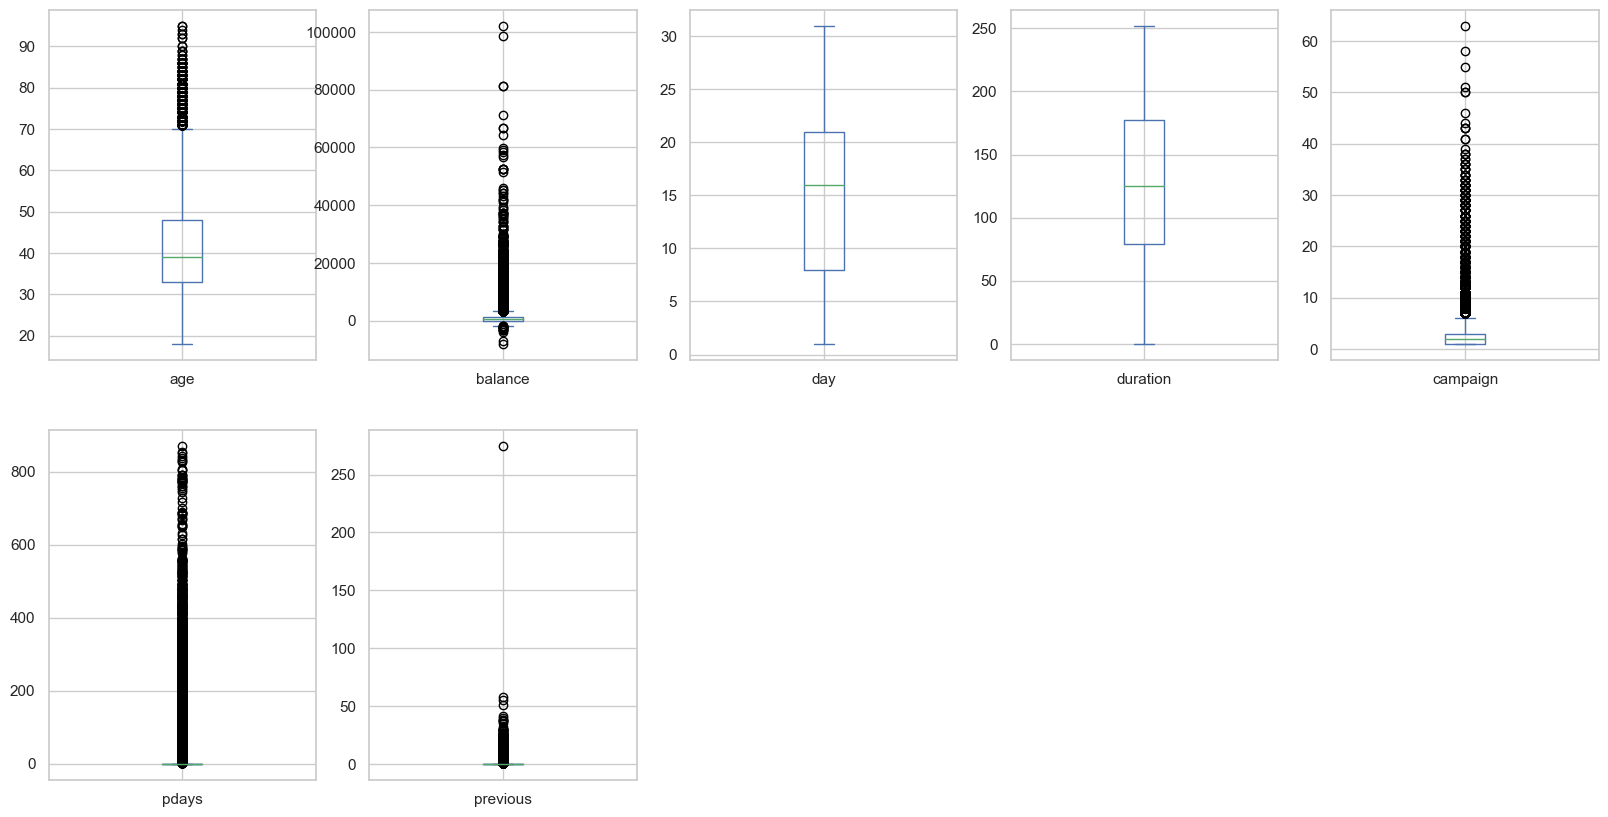

In [76]:
#removing the outliers
column = df[['age','duration','campaign']]
q1 = np.quantile(column,0.25)
q3 = np.quantile(column,0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print(iqr,upper_bound,lower_bound)
df[['age','duration','campaign']] = column[(column > lower_bound) & (column < upper_bound)]
df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10))
plt.show()

In [78]:
#converting categorical variables to numerical labels
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,253,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,253,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,253,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,253,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,253,3,0,0,3,0


In [82]:
df_encoded['y'].value_counts() 
# Split data into features and target variable
x = df_encoded.drop('y', axis=1)
y = df_encoded['y']
print(x.shape)
print(y.shape)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(45211, 16)
(45211,)
(36168, 16)
(9043, 16)
(36168,)
(9043,)


In [83]:
# Initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Training the classifier on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
# Predicting the target variable on the test set
y_pred = clf.predict(x_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8509344244166759
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7952
           1       0.39      0.40      0.39      1091

    accuracy                           0.85      9043
   macro avg       0.65      0.66      0.65      9043
weighted avg       0.85      0.85      0.85      9043

Confusion Matrix:
[[7262  690]
 [ 658  433]]


|--- duration <= 250.50
|   |--- month <= 9.50
|   |   |--- poutcome <= 2.50
|   |   |   |--- poutcome <= 1.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- duration <= 153.50
|   |   |   |   |   |   |--- duration <= 128.50
|   |   |   |   |   |   |   |--- job <= 10.50
|   |   |   |   |   |   |   |   |--- job <= 9.50
|   |   |   |   |   |   |   |   |   |--- pdays <= 389.00
|   |   |   |   |   |   |   |   |   |   |--- day <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- day >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- pdays >  389.00
|   |   |   |   |   |   |   |   |   |   |--- pdays <= 401.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- pdays >  401.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |

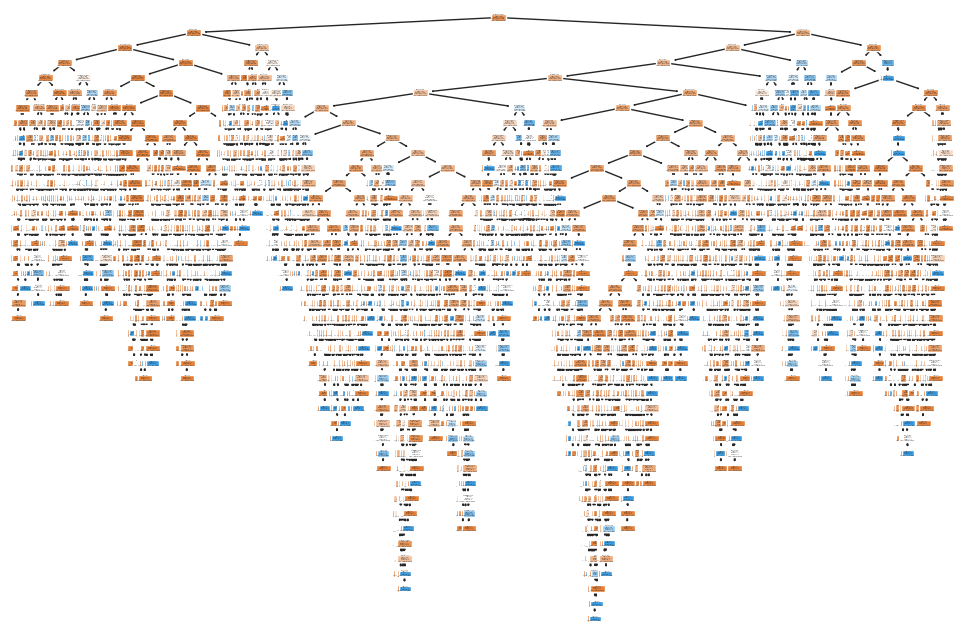

In [95]:
# Plotting the decision tree
tree_text = export_text(clf, feature_names=list(x.columns))
print(tree_text)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(x.columns), class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()